## FoodVision Mini

`Custom datasets` 

We've used some datasets with Pytorch before...

But how do you get your own datasets. 

One of the way to do so is via: `Custom Datasets`.

### Domain Libraries

Depending on what you're working on, vision, text, audio, recommendation, you'll want to look into each of the PyTorch domain libraries for existing data loading function and customizable data loading functions.  

### 0. Importing dependencies and setting Device Agnostic Code.

In [1]:
import torch 
from torch import nn 

#checking PyTorch Version 
print(f'PyTorch Version: {torch.__version__}')

PyTorch Version: 2.1.0+cu118


In [2]:
#setup device agnostic code 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Target device: {device}')

Target device: cuda


In [3]:
# checking our GPU 
!nvidia-smi

Sun Dec 17 09:26:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.15       Driver Version: 512.15       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8     6W /  N/A |      8MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1. Getting Dataset 

**Dataset:** Subset of Food-101

Our dataset is a subset of the Food101 dataset. 

Food101 starts 101 different classes of food and 1000 images per class (750 training images & 250 test images).

Our dataset starts with 3 classes of food and only 10% of the images (~75 training images, 25 testing images per class).

When starting with ML projects, it's important to try things on a small scale and increase the scale when necessary. 

* The whole point is to speed up how fast you can experiment.


In [4]:
import requests
import zipfile 
from pathlib import Path

# Setup path to a data folder 
data_path = Path('data/')
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, dowsnload it and prepare it (unzip)
if image_path.is_dir():
    print(f'{image_path} Directory already exists....skipping dowloading!')
else:
    print(f'{image_path} does not exist, creating one...')
    image_path.mkdir(parents=True,exist_ok=True)

# Download Pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('Downloading Pizza, Steak and Sushi data...')
    f.write(request.content)

#unzip data file 
with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", 'r') as zip_ref:
    print('Unzipping pizza, steak, sushi data...')
    zip_ref.extractall(image_path)

data\pizza_steak_sushi Directory already exists....skipping dowloading!
Unzipping pizza, steak, sushi data...


## 2. Becoming one with Data (Data Preparation & Data Exploration...!)

In [5]:
import os 

def walkthrough_dir(dir_path):
    '''Walks through dir_path and returning its contents'''
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

In [6]:
walkthrough_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 1 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 1 images in data\pizza_steak_sushi\train\pizza\.ipynb_checkpoints
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [7]:
# Setting Train and Testing Paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing the Images 

Let's write some code to: 
1. Get all of the image paths.
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with Images, let's open the images with Python's `PIL`
5. We'll then show the image and print metadata.

In [8]:
image_path

WindowsPath('data/pizza_steak_sushi')

data\pizza_steak_sushi\test\pizza\2508636.jpg
pizza
Random image path: data\pizza_steak_sushi\test\pizza\2508636.jpg
Image class: pizza
Image Height: 512, Image Width: 512


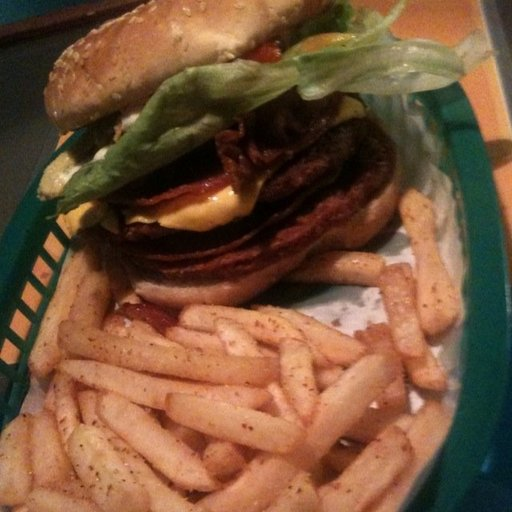

In [16]:
import random 
from PIL import Image

#set random_seed 
RANDOM_SEED = 42 
#random.seed(RANDOM_SEED)

#1. Get all the Image path 
image_path_list = list(image_path.glob('*/*/*.jpg'))

#image_path_list[:5] #all the image path

#2. pick a random image path 
random_image_path = random.choice(image_path_list)
print(random_image_path)

#3. Get image class from path name (the image class is the name of the directory, where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

#4. Open the image
img = Image.open(random_image_path)

# 5. Print some metadata 
print(f'Random image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image Height: {img.height}, Image Width: {img.width}')
img

#### Visualize an image with matplotlib 

In [38]:
image_path

WindowsPath('data/pizza_steak_sushi')

Image Path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image Shape: (408, 512, 3)


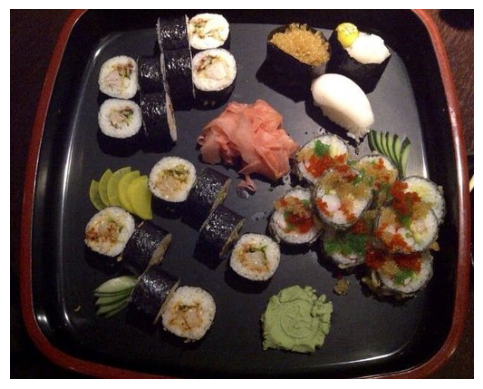

In [10]:
import matplotlib.pyplot as plt

#setting random seed
random.seed(RANDOM_SEED)

#1. get all the image path in a list (List of image paths)
images_path_list = list(image_path.glob('*/*/*.jpg'))

#2. pick a random image path from the list 
random_image_path = random.choice(images_path_list)

#3. Get the Image class (label)
image_class = random_image_path.parent.stem

#4. Open the Image (matplotlib)
img_np = plt.imread(random_image_path)
img = plt.imshow(img_np)

#printing out some info 
print(f'Image Path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image Shape: {img_np.shape}')
img
plt.axis(False)
plt.show()

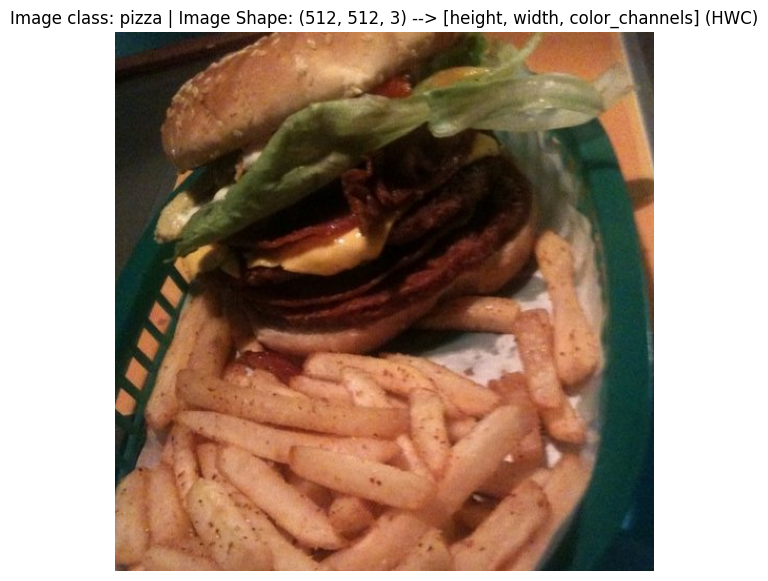

In [60]:
#another solution 
import numpy as np 
import matplotlib.pyplot as plt 

#Turn the image into an Array (because matplotlib needs ndarray)
img_as_array = np.asarray(img)

#plot the image with matplotlib 
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image Shape: {img_as_array.shape} --> [height, width, color_channels] (HWC)')
plt.axis(False)
plt.show()

## 3. Transforming Image Data into PyTorch Objects(Tensors)

Before we can use our image data with PyTorch. 

1. Turn our target data (Images, Audio, Text) into Tensors (In our case, numerical representation of our Images).
2. Turn it into a `torch.utils.data.Dataset` and Subsequently Turn Dataset into a `torch.utils.data.DataLoader`.  

In [37]:
import torch, torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`

We want to Transform our Images (.jpg) into Tensors (Numerical Representation).

In [26]:
# write a transform for Image
# Compose --> Composes Several Transforms together!
data_transfrom = transforms.Compose([
    # 1.Resize all the Images to 64 x 64
    transforms.Resize(size=(64, 64)),
    # 2. Flip the Images randomly on the Horizontally 
    transforms.RandomHorizontalFlip(p=0.5),
    # 3. Turn the Image into torch Tensor. 
    # Converts PIL Images into Tensors
    transforms.ToTensor()
])

In [27]:
transformed_img = data_transfrom(img)

In [29]:
transformed_img.shape

torch.Size([3, 64, 64])

In [31]:
type(transformed_img)

torch.Tensor

In [32]:
transformed_img.dtype

torch.float32

**Note:** 
> Matplotlib accepts Image as `[Height,Width,Color_channels] (HWC)` (color_channels last).
> 
> PyTorch accepts Images as `[Color_channels, Height, Width] (CHW)` (color_channels first).

In [50]:
def plot_transformed_images(image_paths: list, transform: torchvision.transforms 
                            , n: int=3, seed=None):
    '''
    Selects random images from a path of Images and loads/transforms them 
    then plots the Original vs Transformed verion.  
    '''
    #setting random seed 
    if seed:
        random.seed(seed)
    #getting random images (n) path from Image path listra
    random_image_paths = random.sample(image_paths, k=n)
    #loop over sampled Image paths
    for image_path in random_image_paths:
        # open the PIL image 
        with Image.open(image_path) as f:
            # create a Figure and axis
            fig, ax = plt.subplots(nrows=1, ncols=2)
            # In the 0th Axis, we want to plot original image 
            ax[0].imshow(f)
            ax[0].set_title(f'Original\nSize: {f.size}')
            ax[0].axis(False)

            # Transform and Plot the Target Image
            transformed_image = transform(f).permute(1,2,0) #note: we will need to change shape for matplotlib
            # we need to shuffle the axis using Permute 
            # (C: 0, H: 1, W: 2) ==> (H:1, W:2, C:0) [H,W,C]
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed Image\nShape: {transformed_image.shape}')
            ax[1].axis(False) # Or axis('off')

            #super title
            fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)    

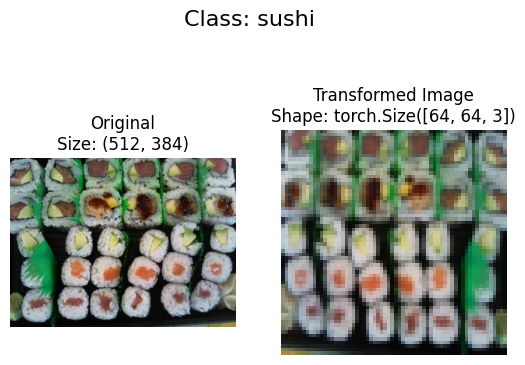

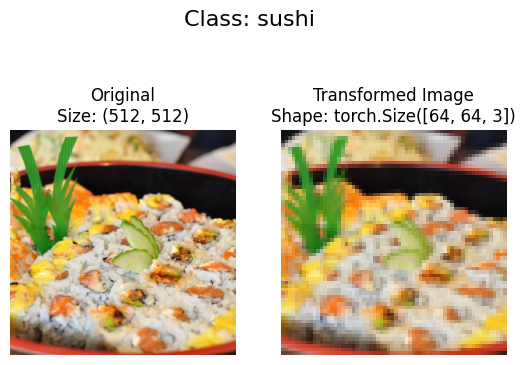

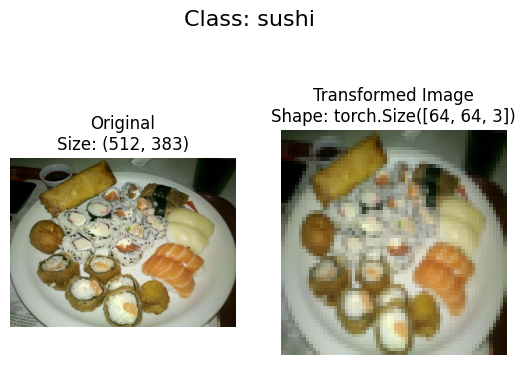

In [53]:
plot_transformed_images(image_paths=image_path_list, 
                        transform=data_transfrom,
                        n=3,
                        seed=None)

## 4. Option-1: Loading image data using `ImageFolder`

It's a Pre-built dataset function. 

We can load image classification data using `torchvision.datasets.ImageFolder`

In [54]:
train_dir

WindowsPath('data/pizza_steak_sushi/train')

### 4.1 Creating a Dataset using `ImageFolder` Module.

In [55]:
# Using ImageFolder to create dataset
from torchvision import datasets

#train dataset
train_data = datasets.ImageFolder(root=train_dir, #training dir
                                 transform=data_transfrom, # transform for Data
                                 target_transform=None) # transform for Labels/Target

#test dataset
test_data = datasets.ImageFolder(root=test_dir, #Test data dir
                                 transform=data_transfrom,
                                 target_transform=None)

In [56]:
train_data

Dataset ImageFolder
    Number of datapoints: 226
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [57]:
test_data

Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [59]:
# Get class names as list 
class_names = train_data.classes

class_names

['pizza', 'steak', 'sushi']

In [61]:
# Get class names as Dict. 
class_dict = train_data.class_to_idx

class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [62]:
#check the length of the datasets
len(train_data), len(test_data)

(226, 75)

In [63]:
# getting a sample 
train_data.samples[0]
#image_path, class_labels

('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

In [70]:
# Index on train_data Dataset to get single Image and label (image, label)
img, label =  train_data[0]

In [71]:
img

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [72]:
label 

0

In [73]:
class_names[label]

'pizza'

In [75]:
# printing out some info 
print(f'Image Tensor:\n {img}')
print(f'Image Shape:\n {img.shape}')
print(f'Image datatype:\n {img.dtype}')
print(f'Image Label:\n {label}')
print(f'Label type:\n {type(label)}')

Image Tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Orginal shape: torch.Size([3, 64, 64]) --> [color_channels, height, width]
Permuted Shape: torch.Size([64, 64, 3]) --> [height, width, color_channels]


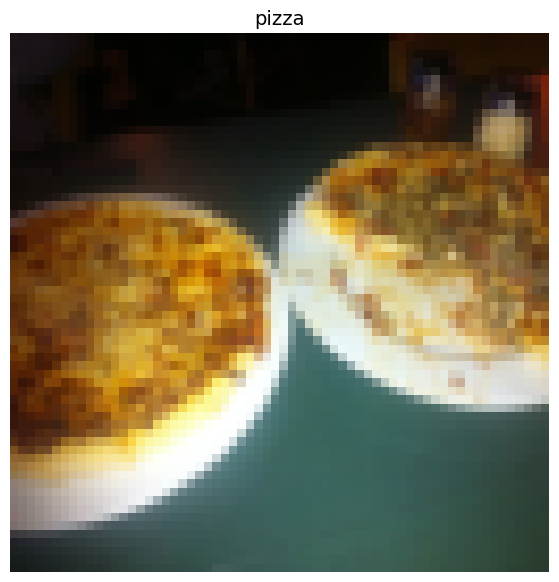

In [81]:
# Rearrange order of Dimension 
img_permuted = img.permute(1,2,0) # (C,H,W) --> (H,W,C)

# Print out different shapes 
print(f'Orginal shape: {img.shape} --> [color_channels, height, width]')
print(f'Permuted Shape: {img_permuted.shape} --> [height, width, color_channels]')

# Plot the Image 
plt.figure(figsize=(10,7))
plt.imshow(img_permuted)
plt.axis('off')
plt.title(class_names[label], fontsize=14)
plt.show()

#### 4.2 DataLoader 

Turn our dataset into Batches. 

A `DataLoader` is going to help us turn our `Dataset`'s into iterables and we can customize the `batch_size`. 

So our model can see Batch of Images at a time.

In [82]:
from torch.utils.data import DataLoader

In [100]:
print(f'No. of CPU workers: {os.cpu_count()}')

No. of CPU workers: 12


In [93]:
# Turn train and test datasets into DataLoaders
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              num_workers=os.cpu_count()
                              shuffle=True,)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=True)

In [94]:
print(f'No of Train Batches: {len(train_dataloader)}')

No of Train Batches: 8


In [95]:
225/32

7.03125

In [96]:
print(f'No of Test Batches: {len(test_dataloader)}')

No of Test Batches: 3


In [97]:
75/32

2.34375

#### DataLoader will add Batch dimension to our dataset 

[batch_size, color_channel, height, width]

In [104]:
#get 1st batch 
img, label = next(iter(train_dataloader))

print(f'Image shape: {img.shape} --> [batch_size, color_channels, height, width]')
print(f'Label Shape: {label.shape} --> [batch_size]')

Image shape: torch.Size([32, 3, 64, 64]) --> [batch_size, color_channels, height, width]
Label Shape: torch.Size([32]) --> [batch_size]


## 5. Option-2: Loading Image Data with a Custom `Dataset` 

1. Want to be able to load images from file.
2. Want to be able to get class_names from the Dataset.
3. Want to be able to get classes as dictionary from the Dataset.

Pros: 
* Can Create a `Dataset` out of almost anything.
* Not limited to PyTorch pre-built `Dataset` functions.

Cons: 
* Even though you could create `Dataset` out of almost anything, it doesn't mean it will work!
* Using a Custom `Dataset` often results in us writing more code, which could be prune to errors or performance issues.

All custom datasets in PyTorch, often subclass - `torch.utils.data.Dataset`

In [106]:
#importing some dependencies
import os 
import pathlib
import torch 
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List #type hinting

In [107]:
## Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names 

We want a function to: 
1. Get the class names using `os.scandir()` to traverse a target directory. (Ideally the directory should be in standard image classification format). 
2. Raise an error if the class names aren't found! (if this happens, there might be something wrong with directory structure). 
3. Turn the class names into a dict and a list and return them. 

In [108]:
#lets build a helper function to replicate this functionality

In [115]:
print(list(os.scandir(target_directory))) 

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]


In [116]:
# setup the path for target directory 
target_directory = train_dir
print(f'Target dir: {target_directory}')

# Get the class names from the Target directory 
class_names = sorted([entry.name for entry in os.scandir(target_directory)])

class_names

Target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [123]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]: ## type hinting
    '''
    Finds Class folder names from given target directory and
    returns List of class_names and Dict
    '''
    # 1. Get the class names by scanning the target directory 
    classes = sorted([entry.name for entry in os.scandir(directory) if entry.is_dir()])

    # 2. Raise an error, if class names couldn't be found. 
    #dict (class_to_idx)
    if not classes: 
        raise FileNotFoundError(f"Couldn't find any classes in {directory}...Please check file structure.")

    # 3. Create a dictionary of index labels
    classes_to_idx = {class_name: i for i,class_name in  enumerate(classes)}
    return classes, classes_to_idx

In [124]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`.

To Create our own Custom dataset, we want to:

1. Sub-class `torch.utils.data.Dataset`.
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create Several Attributes:
   * Paths - paths of our images.
   * transform - the transform we'd like to use.
   * classes - a list of the target clasess.
   * class_to_idx - a dict of the target classes mapped into integer labels.
4. Create a function to `load_images()`, this function will open an image.
5. Overwrite the `__len__()` method to return the length of our dataset.
6. Overwrite the `__getitem__()` method to return a given sample when passed a index  

In [131]:
# write a custom dataset class 
from torch.utils.data import Dataset

# 1. Subclass Dataset
class MyOwnDataset(Dataset):
    # 2. initialize our custom dataset
    def __init__(self, tar_dir: str, tranform: None):
        super().__init__()
        # 3. create class attributes
        # Get all the Image Paths 
        self.paths = list(pathlib.Path(tar_dir).glob('*/*.jpg'))
        #transforms 
        self.tranform = tranform
        #create a classes, class_to_idx
        self.classes, self.class_to_idx = find_classes(tar_dir)
    
    # 4. Create a function to load images
    def load_images(self, index: int) -> Image.Image: 
        '''
        Opens an image via a path and returns it. 
        '''
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite __len__() method
    def __len__(self) -> int:
        '''
        Returns no. of samples in our dataset.
        '''
        return len(self.paths)

    # 6. Overwrite __getitem__() == [] (indexing)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        '''
        Returns one sample of data, data and label (X and y). 
        '''
        img = self.load_images(index)
        img_tensor = tranform.ToTensor(img)
        #class
        class_name = class_to_idx[image_path.parent.stem]
        return img_tensor, class_name

In [127]:
## __getitem__() method does indexing 
img, label = train_data[0] #0 is the index
# we need to return img -> torch Tensor and label: int

In [130]:
class_dict['pizza']

0